<a href="https://colab.research.google.com/github/Jastej786/Finsearch_24/blob/main/Makowitz_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt

In [13]:
from google.colab import  drive
drive.mount('/drive')

Mounted at /drive


In [51]:
risk_free_rate = 0.07365 #returns on 10-year treasury bond

In [52]:
tickers = ['RELIANCE.NS','TATASTEEL.NS','ONGC.NS','HDFCBANK.NS','INFY.NS','HINDUNILVR.NS','LT.NS','GLAXO.NS','^NSEI']

In [53]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()

    start = dt.datetime(syear,smonth,sday)
    end = dt.datetime(eyear,emonth,eday)

    for x in tickers:
        mult_df[x] = yf.download(x, start, end)[col_name]

    return mult_df

In [54]:
mult_df = merge_df_by_column_name('Adj Close',  2007,1,1,
                                  2009,6,1, *tickers)
mult_df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,RELIANCE.NS,TATASTEEL.NS,ONGC.NS,HDFCBANK.NS,INFY.NS,HINDUNILVR.NS,LT.NS,GLAXO.NS,^NSEI
Date,,,,,,,,,
2007-01-02,255.997314,10.397120,71.520439,93.521423,199.602280,151.524490,257.252350,406.540436,NaN
2007-01-03,256.726837,10.239623,71.165611,93.110611,203.001160,148.443527,260.106506,412.041138,NaN
2007-01-04,255.917419,10.116768,71.316528,91.777718,200.713226,147.463287,263.101593,412.934540,NaN
2007-01-05,257.446259,10.178688,73.017166,92.376427,199.813034,149.388840,259.128723,406.452881,NaN
2007-01-08,255.187897,10.076718,74.318138,89.583916,193.713425,147.113144,257.525452,402.966797,NaN
2007-01-09,255.477737,9.881133,74.750412,88.618088,192.352020,146.938171,252.107803,405.261597,NaN
2007-01-10,254.448380,9.818234,72.637886,87.285202,190.099228,145.992798,248.425674,399.287964,NaN
2007-01-11,259.115082,10.036423,74.599503,87.066673,191.728485,152.539764,253.578995,405.857208,NaN
2007-01-12,267.708923,10.167874,75.337669,92.787239,195.276733,153.835175,258.318298,408.677734,NaN


give random weights and make plot of efficient frontier

In [55]:
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252 # 252 average trading days per year
mean_ret

,0
RELIANCE.NS,0.251296
TATASTEEL.NS,0.058186
ONGC.NS,0.152525
HDFCBANK.NS,0.133694
INFY.NS,-0.136635
HINDUNILVR.NS,0.059011
LT.NS,0.285617
GLAXO.NS,0.036225
^NSEI,-0.038068


In [56]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list


for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(9)
    p_weights /= np.sum(p_weights)

    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)

    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)

    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)

    # Store the weights for each portfolio
    p_wt.append(p_weights)

# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.0913292 , 0.08404181, 0.07156295, ..., 0.0869425 , 0.06096358,
        0.06398072]),
 array([0.34998582, 0.40200945, 0.37409259, ..., 0.34058562, 0.3232305 ,
        0.35256324]),
 array([ 0.05051406,  0.02584966, -0.00557896, ...,  0.03902837,
        -0.03924885, -0.02742566]),
 array([[0.09292471, 0.04847694, 0.21528219, ..., 0.07716313, 0.16490602,
         0.18450139],
        [0.27319431, 0.1556085 , 0.01028477, ..., 0.01049346, 0.03040015,
         0.16364353],
        [0.12141112, 0.20562632, 0.09937242, ..., 0.00442913, 0.01927736,
         0.02930172],
        ...,
        [0.18826505, 0.12074246, 0.12025741, ..., 0.04308053, 0.19259498,
         0.05566694],
        [0.16298266, 0.01854844, 0.06734533, ..., 0.06461934, 0.21885001,
         0.17972838],
        [0.06579823, 0.14470725, 0.04038599, ..., 0.02626456, 0.13926002,
         0.1384244 ]]))

<Axes: xlabel='Volatility', ylabel='Return'>

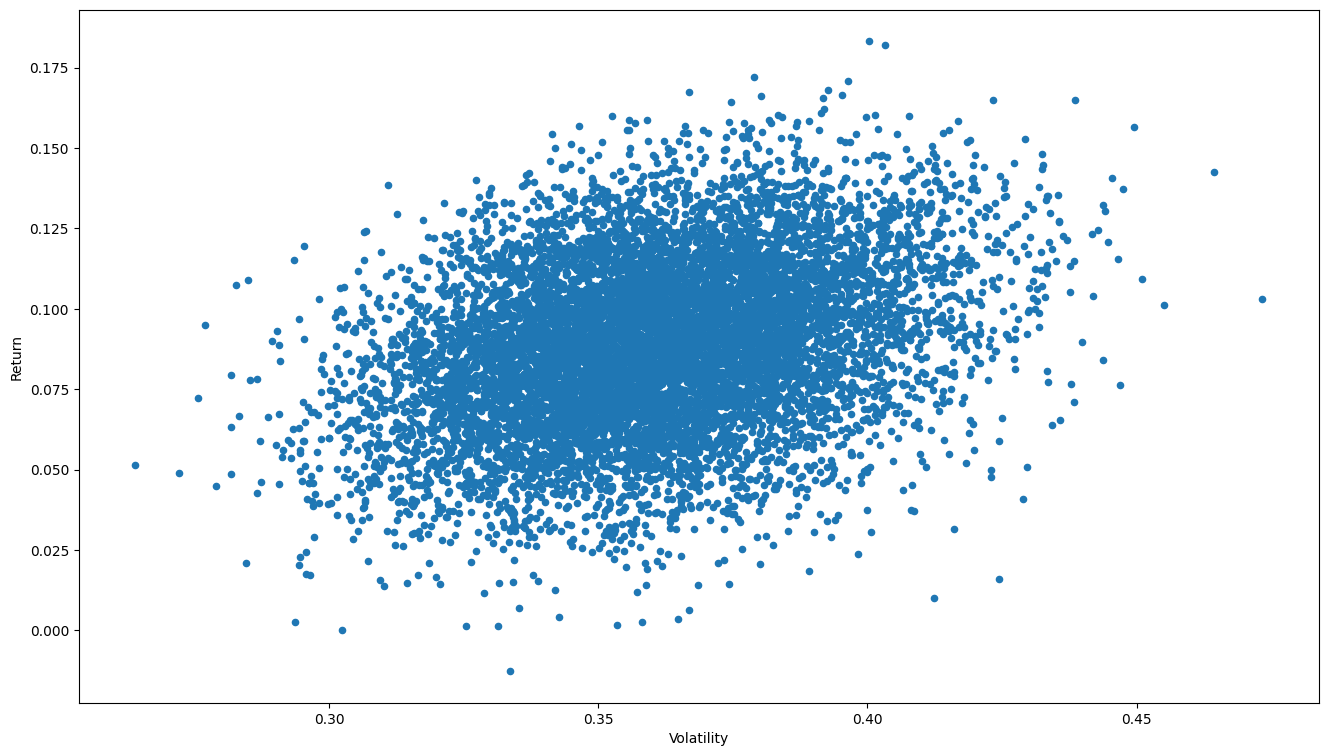

In [57]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

In [58]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < 9:
    print("Stock : %s : %2.2f" % (tickers[i], (p_wt[4296][i] * 100)))
    i += 1

# Find volatility of that portfolio
print("\nVolatility :", p_vol[4296])

# Find return of that portfolio
print("Return :", p_ret[4296])

Stock : RELIANCE.NS : 5.88
Stock : TATASTEEL.NS : 15.44
Stock : ONGC.NS : 12.00
Stock : HDFCBANK.NS : 8.86
Stock : INFY.NS : 12.32
Stock : HINDUNILVR.NS : 9.63
Stock : LT.NS : 6.73
Stock : GLAXO.NS : 15.53
Stock : ^NSEI : 13.62

Volatility : 0.34926755163208045
Return : 0.06240332793998315


#addition of gold

In [30]:
gold_df = pd.read_csv('/drive/MyDrive/Colab_Notebooks/Finsearch_24/data/gold_prices.csv')
gold_df.head()

,Date,Price
0,03/12/07,30973.95
1,04/12/07,31433.46
2,05/12/07,31312.64
3,06/12/07,31647.23
4,07/12/07,31228.46


In [31]:
gold_df = gold_df.set_index(pd.DatetimeIndex(gold_df['Date'].values))
gold_df = gold_df.drop(['Date'], axis = 1)
gold_df['Price'] = gold_df['Price'].astype(float)
gold_df = gold_df.rename(columns = {'Price':'Gold_Price'})
gold_df.head()

,Gold_Price
2007-03-12,30973.95
2007-04-12,31433.46
2007-05-12,31312.64
2007-06-12,31647.23
2007-07-12,31228.46


In [35]:
mult_df = mult_df.merge(gold_df, how = 'inner', left_index = True, right_index = True)

In [36]:
mult_df.head()

,RELIANCE.NS,TATASTEEL.NS,ONGC.NS,HDFCBANK.NS,INFY.NS,HINDUNILVR.NS,LT.NS,GLAXO.NS,^NSEI,Gold_Price
2007-03-12,262.952332,9.458762,64.730118,83.037415,185.782516,129.537979,264.044189,408.274719,NaN,30973.95
2007-04-12,279.822876,10.773793,69.399734,83.762863,179.682846,145.537704,277.895874,412.037445,NaN,31433.46
2007-06-12,342.624207,13.488954,70.215401,95.755127,175.320190,135.030579,338.234436,469.607117,NaN,31647.23
2007-07-12,346.748444,15.023668,72.242287,105.725304,169.389526,146.291977,421.801880,457.247681,NaN,31228.46
2007-10-12,517.445435,19.011200,90.600288,126.074875,170.050415,159.590775,596.960144,401.333069,5428.25,31898.35


In [37]:
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252 # 252 average trading days per year
mean_ret

,0
RELIANCE.NS,0.451304
TATASTEEL.NS,0.185647
ONGC.NS,0.367335
HDFCBANK.NS,0.347311
INFY.NS,-0.199351
HINDUNILVR.NS,0.237265
LT.NS,0.516490
GLAXO.NS,0.064741
^NSEI,-0.208766
Gold_Price,0.317729


In [38]:
returns.cov() * 252

,RELIANCE.NS,TATASTEEL.NS,ONGC.NS,HDFCBANK.NS,INFY.NS,HINDUNILVR.NS,LT.NS,GLAXO.NS,^NSEI,Gold_Price
RELIANCE.NS,0.633296,0.538993,0.318192,0.338594,0.154575,0.100906,0.477888,0.042261,0.297653,0.039817
TATASTEEL.NS,0.538993,0.881558,0.319339,0.361048,0.152916,0.132027,0.552884,0.053055,0.330732,-0.020858
ONGC.NS,0.318192,0.319339,0.371210,0.249005,0.106364,0.113284,0.319288,0.006124,0.217368,-0.002418
HDFCBANK.NS,0.338594,0.361048,0.249005,0.419209,0.126481,0.100685,0.361204,0.030532,0.235187,-0.037306
INFY.NS,0.154575,0.152916,0.106364,0.126481,0.275092,0.067233,0.100102,0.051540,0.138839,-0.016716
HINDUNILVR.NS,0.100906,0.132027,0.113284,0.100685,0.067233,0.198168,0.099863,0.023514,0.093696,0.003603
LT.NS,0.477888,0.552884,0.319288,0.361204,0.100102,0.099863,0.661008,0.018663,0.276341,0.007405
GLAXO.NS,0.042261,0.053055,0.006124,0.030532,0.051540,0.023514,0.018663,0.140882,0.050795,-0.011839
^NSEI,0.297653,0.330732,0.217368,0.235187,0.138839,0.093696,0.276341,0.050795,0.239210,-0.000837
Gold_Price,0.039817,-0.020858,-0.002418,-0.037306,-0.016716,0.003603,0.007405,-0.011839,-0.000837,0.659550


In [39]:
returns.corr()

,RELIANCE.NS,TATASTEEL.NS,ONGC.NS,HDFCBANK.NS,INFY.NS,HINDUNILVR.NS,LT.NS,GLAXO.NS,^NSEI,Gold_Price
RELIANCE.NS,1.000000,0.721364,0.656260,0.657145,0.370337,0.284837,0.738618,0.141486,0.879095,0.061609
TATASTEEL.NS,0.721364,1.000000,0.558235,0.593915,0.310520,0.315878,0.724278,0.150547,0.773769,-0.027354
ONGC.NS,0.656260,0.558235,1.000000,0.631222,0.332849,0.417680,0.644568,0.026781,0.769485,-0.004888
HDFCBANK.NS,0.657145,0.593915,0.631222,1.000000,0.372452,0.349326,0.686174,0.125637,0.783926,-0.070948
INFY.NS,0.370337,0.310520,0.332849,0.372452,1.000000,0.287958,0.234747,0.261805,0.540092,-0.039243
HINDUNILVR.NS,0.284837,0.315878,0.417680,0.349326,0.287958,1.000000,0.275921,0.140728,0.456755,0.009966
LT.NS,0.738618,0.724278,0.644568,0.686174,0.234747,0.275921,1.000000,0.061159,0.803984,0.011215
GLAXO.NS,0.141486,0.150547,0.026781,0.125637,0.261805,0.140728,0.061159,1.000000,0.305706,-0.038840
^NSEI,0.879095,0.773769,0.769485,0.783926,0.540092,0.456755,0.803984,0.305706,1.000000,-0.002081
Gold_Price,0.061609,-0.027354,-0.004888,-0.070948,-0.039243,0.009966,0.011215,-0.038840,-0.002081,1.000000


from matplotlib import pyplot as plt
_df_0['RELIANCE.NS'].plot(kind='hist', bins=20, title='RELIANCE.NS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TATASTEEL.NS'].plot(kind='hist', bins=20, title='TATASTEEL.NS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['ONGC.NS'].plot(kind='hist', bins=20, title='ONGC.NS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['HDFCBANK.NS'].plot(kind='hist', bins=20, title='HDFCBANK.NS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='RELIANCE.NS', y='TATASTEEL.NS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='TATASTEEL.NS', y='ONGC.NS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='ONGC.NS', y='HDFCBANK.NS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='HDFCBANK.NS', y='INFY.NS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['RELIANCE.NS'].plot(kind='line', figsize=(8, 4), title='RELIANCE.NS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['TATASTEEL.NS'].plot(kind='line', figsize=(8, 4), title='TATASTEEL.NS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['ONGC.NS'].plot(kind='line', figsize=(8, 4), title='ONGC.NS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['HDFCBANK.NS'].plot(kind='line', figsize=(8, 4), title='HDFCBANK.NS')
plt.gca().spines[['top', 'right']].set_visible(False)

In [42]:
weights = np.random.random(10)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.14449582 0.01393248 0.12376357 0.10950804 0.11817173 0.09672603
 0.09564314 0.13365538 0.1033126  0.06079121]
Total Weight : 1.0000000000000002


In [43]:
# Provide return of portfolio using random weights over the whole dataset
np.sum(weights * returns.mean()) * 252

0.2064849253779263

In [44]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.41294193319771644

In [45]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list


for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(10)
    p_weights /= np.sum(p_weights)

    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)

    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)

    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)

    # Store the weights for each portfolio
    p_wt.append(p_weights)

# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.26479538, 0.18778033, 0.19379034, ..., 0.19618811, 0.21362809,
        0.13892245]),
 array([0.39514969, 0.46560611, 0.43181613, ..., 0.39324761, 0.54441117,
        0.44655782]),
 array([0.48372902, 0.24512205, 0.27822105, ..., 0.31160549, 0.25711833,
        0.14616797]),
 array([[0.20656223, 0.02718804, 0.01896705, ..., 0.22137646, 0.03625947,
         0.05130151],
        [0.08690454, 0.14307051, 0.00236621, ..., 0.03452302, 0.09867941,
         0.05786716],
        [0.13385412, 0.03290334, 0.06180284, ..., 0.03560213, 0.16223188,
         0.13146619],
        ...,
        [0.04043206, 0.06228513, 0.00028116, ..., 0.23254363, 0.11287531,
         0.03141867],
        [0.19155428, 0.20189876, 0.01353585, ..., 0.00990496, 0.1629681 ,
         0.11088512],
        [0.04329027, 0.20394112, 0.0062727 , ..., 0.1188156 , 0.14254866,
         0.01827185]]))

<Axes: xlabel='Volatility', ylabel='Return'>

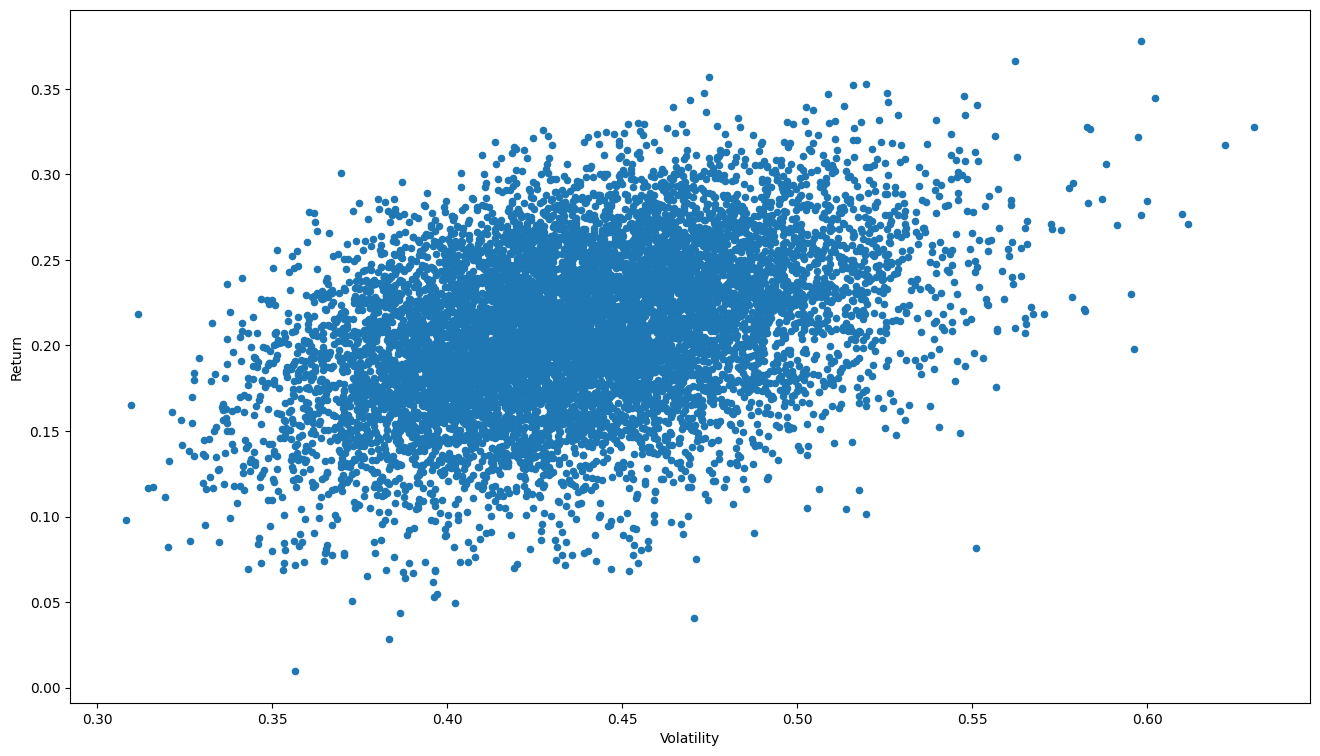

In [46]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

In [48]:
port_list = ['RELIANCE.NS','TATASTEEL.NS','ONGC.NS','HDFCBANK.NS','INFY.NS','HINDUNILVR.NS','LT.NS','GLAXO.NS','^NSEI', 'Gold']

In [49]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < 10:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[4296][i] * 100)))
    i += 1

# Find volatility of that portfolio
print("\nVolatility :", p_vol[4296])

# Find return of that portfolio
print("Return :", p_ret[4296])

Stock : RELIANCE.NS : 8.19
Stock : TATASTEEL.NS : 10.90
Stock : ONGC.NS : 0.09
Stock : HDFCBANK.NS : 16.41
Stock : INFY.NS : 16.19
Stock : HINDUNILVR.NS : 5.15
Stock : LT.NS : 2.04
Stock : GLAXO.NS : 15.51
Stock : ^NSEI : 10.79
Stock : Gold : 14.74

Volatility : 0.38735468442066745
Return : 0.13932930936079316
